
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [4]:
import numpy as np, pandas as pd 
import matplotlib.pyplot as plt



In [5]:
df= pd.read_csv('pp.csv', names = ['value'], header = 0)  


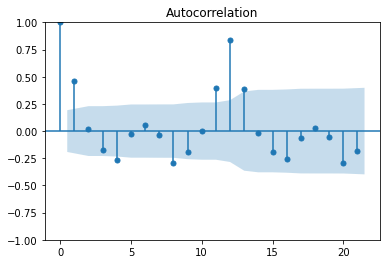

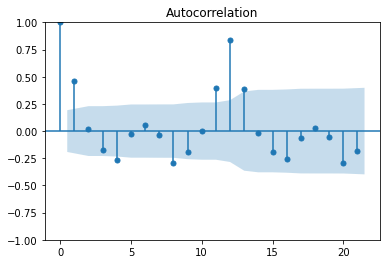

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
plot_acf(df.value)

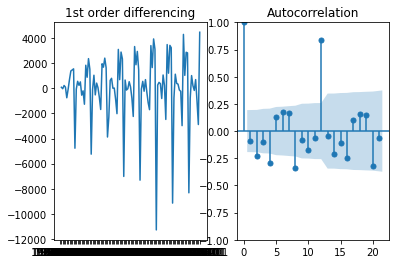

In [7]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df.value.diff())
ax2=f.add_subplot(122)
plot_acf(df.value.diff().dropna(),ax=ax2)
plt.show()

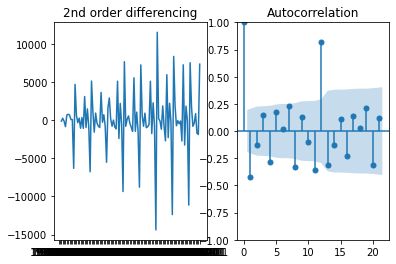

In [8]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(df.value.diff().diff())
ax2=f.add_subplot(122)
plot_acf(df.value.diff().diff().dropna(),ax=ax2)
plt.show()

In [9]:
from statsmodels.tsa.stattools import adfuller
res = adfuller( df.value.dropna())
print('pvalue',res[1])
res = adfuller( df.value.diff().dropna())
print('pvalue',res[1])
res = adfuller( df.value.diff().diff().dropna())
print('pvalue',res[1])

pvalue 0.23510314707076535
pvalue 3.375757724014521e-10
pvalue 4.539822950672561e-12


C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


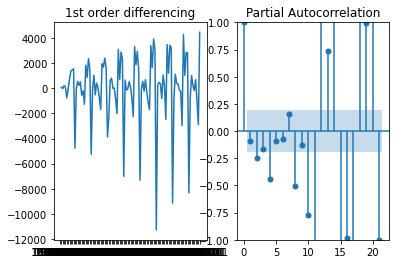

In [10]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df.value.diff())

ax2=f.add_subplot(122)
plot_pacf(df.value.diff().dropna(),ax=ax2)
plt.show()

C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


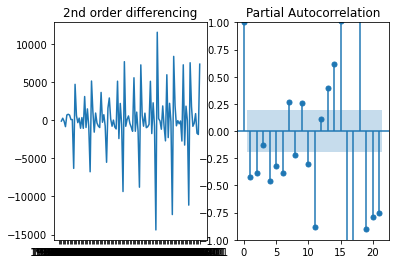

In [11]:
f=plt.figure()
ax1=f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(df.value.diff().diff())

ax2=f.add_subplot(122)
plot_pacf(df.value.diff().diff().dropna(),ax=ax2)
plt.show()

In [14]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

arima_model=sm.tsa.arima.ARIMA(df.value,order=(1,1,2))
model=arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  104
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -940.021
Date:                Tue, 19 Jul 2022   AIC                           1888.042
Time:                        20:02:12   BIC                           1898.580
Sample:                    02-01-1964   HQIC                          1892.310
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2086      0.159     -1.313      0.189      -0.520       0.103
ma.L1         -0.1636      0.119     -1.378      0.168      -0.396       0.069
ma.L2         -0.7552      0.096     -7.860      0.0

C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [15]:
from statsmodels.tsa.arima_model import ARIMA

arima_model=sm.tsa.arima.ARIMA(df.value,order=(1,2,2))
model=arima_model.fit()
print(model.summary())

C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  104
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -948.883
Date:                Tue, 19 Jul 2022   AIC                           1905.766
Time:                        20:02:16   BIC                           1916.266
Sample:                    02-01-1964   HQIC                          1910.018
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7331      0.209     -3.507      0.000      -1.143      -0.323
ma.L1         -0.1183      0.122     -0.969      0.333      -0.358       0.121
ma.L2         -0.8817      0.166     -5.303      0.0

In [35]:
from statsmodels.tsa.arima_model import ARIMA

arima_model=sm.tsa.arima.ARIMA(df.value,order=(1,1,3))
model=arima_model.fit()
print(model.summary())

C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  104
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -939.346
Date:                Tue, 19 Jul 2022   AIC                           1888.693
Time:                        20:15:41   BIC                           1901.867
Sample:                    02-01-1964   HQIC                          1894.029
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5910      0.407     -1.450      0.147      -1.390       0.208
ma.L1          0.2198      0.454      0.484      0.629      -0.670       1.110
ma.L2         -0.8428      0.156     -5.397      0.0

C:\Users\laksh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


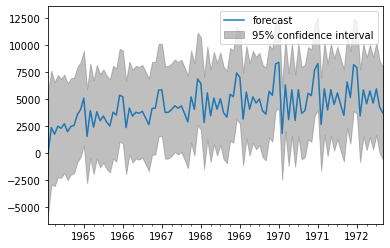

In [37]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(model,dynamic=False)
plt.show()

In [18]:
ypred=pd.Series(model.forecast(20)[0],index=df.value[80:].index)
y_true=df.value[80:]


4592317.969027227

In [20]:
from sklearn.metrics import mean_squared_error
import math

In [22]:
MSE = mean_squared_error(y_true, ypred)
 
RMSE = math.sqrt(MSE)
RMSE

3030.616428724436